In [17]:
# Define the graph
sample_gml = """graph [
  directed 1

  node [
    id 0
    label "MonthConsump"
  ]

  node [
    id 1
    label "NetInc"
  ]
    
  node [
    id 2
    label "HouseholdSize"
  ]

  node [
    id 3
    label "Age"
  ]
    
  node [
    id 4
    label "MeanPrior"
  ] 

  node [
    id 5
    label "UncertPrior"
  ]
    
  node [
    id 6
    label "MeanTreat"
  ]
    
  node [
    id 7
    label "UncertTreat"
  ]
    
  node [
    id 8
    label "BothTreat"
  ]
    
  node [
    id 9
    label "MeanPost"
  ]

  node [
    id 10
    label "UncertPost"
  ]
    
  edge [
    source 1
    target 0
  ]
     


  
  edge [
    source 3
    target 0
  ]
    
  edge [
    source 2
    target 0
  ]

  edge [
    source 9
    target 0
  ]

  edge [
    source 10
    target 0
  ]

  edge [
    source 6
    target 4
  ]
  
  edge [
    source 4
    target 9
  ]
  
  edge [
    source 8
    target 4
  ]
  
  edge [
    source 7
    target 4
  ]
  
  edge [
    source 6
    target 5
  ]
  
  edge [
    source 5
    target 9
  ]
  
  edge [
    source 8
    target 5
  ]
  
  edge [
    source 7
    target 5
  ]
  
  edge [
    source 4
    target 10
  ]
  
  edge [
    source 5
    target 10
  ]
 
]"""


C:\Users\Zach\AppData\Local\Temp\ipykernel_37768\3214743789.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


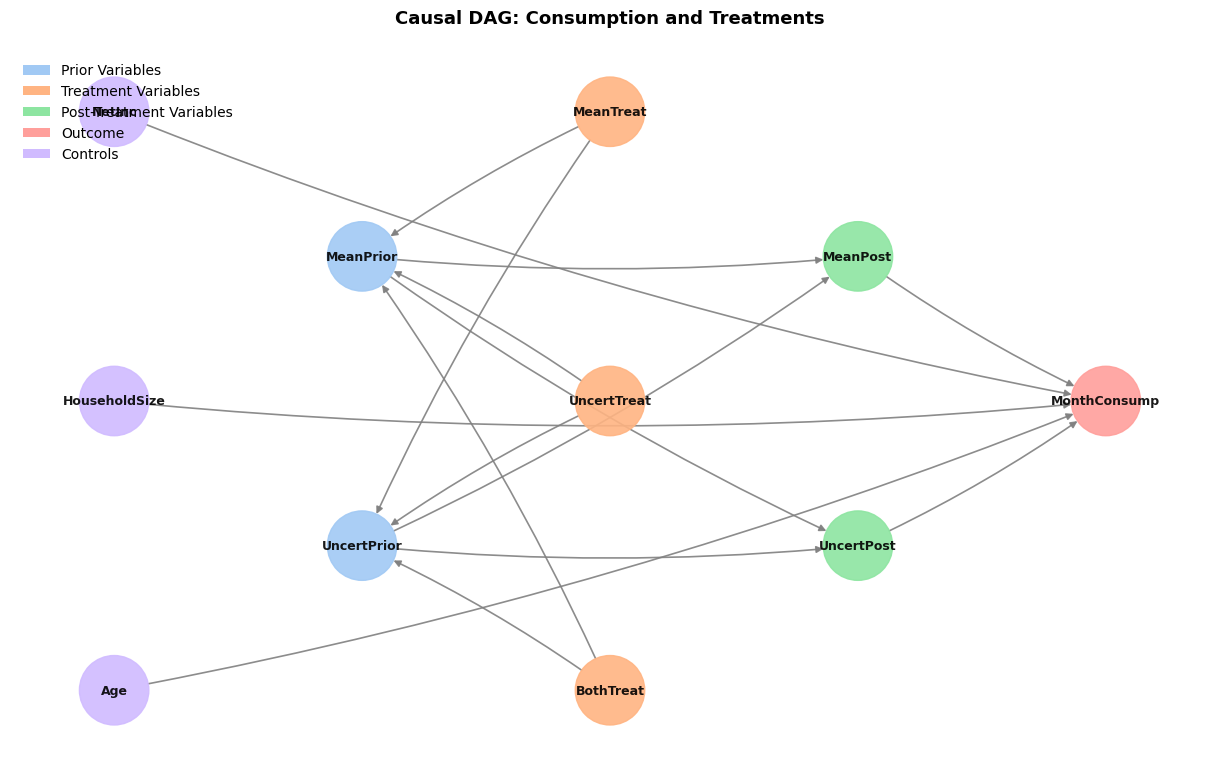

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === Parse graph ===
graph = nx.parse_gml(sample_gml)

# === Define color groups ===
group_colors = {
    "Prior": "#A1C9F4",      # light blue
    "Treat": "#FFB482",      # orange
    "Post": "#8DE5A1",       # green
    "Outcome": "#FF9F9B",    # pink
    "Other": "#D0BBFF"       # purple
}

# === Assign colors ===
node_colors = []
for node in graph.nodes():
    label = str(node)
    if "Prior" in label:
        node_colors.append(group_colors["Prior"])
    elif "Treat" in label:
        node_colors.append(group_colors["Treat"])
    elif "Post" in label:
        node_colors.append(group_colors["Post"])
    elif "Consump" in label:
        node_colors.append(group_colors["Outcome"])
    else:
        node_colors.append(group_colors["Other"])

# === Manual layout (clean left-to-right) ===
pos = {
    # Controls
    "NetInc": (0, 1),
    "HouseholdSize": (0, 0),
    "Age": (0, -1),
    # Prior stage
    "MeanPrior": (1, 0.5),
    "UncertPrior": (1, -0.5),
    # Treatment stage
    "MeanTreat": (2, 1),
    "UncertTreat": (2, 0),
    "BothTreat": (2, -1),
    # Post-treatment
    "MeanPost": (3, 0.5),
    "UncertPost": (3, -0.5),
    # Outcome
    "MonthConsump": (4, 0)
}

# === Plot ===
plt.figure(figsize=(12, 7))
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=2500,
    node_color=node_colors,
    font_color="black",
    font_size=9,
    font_weight="bold",
    edge_color="gray",
    width=1.2,
    alpha=0.9,
    connectionstyle="arc3,rad=0.05"
)

# === Legend ===
legend_elements = [
    Patch(facecolor=group_colors["Prior"], label="Prior Variables"),
    Patch(facecolor=group_colors["Treat"], label="Treatment Variables"),
    Patch(facecolor=group_colors["Post"], label="Post-Treatment Variables"),
    Patch(facecolor=group_colors["Outcome"], label="Outcome"),
    Patch(facecolor=group_colors["Other"], label="Controls")
]
plt.legend(handles=legend_elements, loc="upper left", frameon=False)

plt.title("Causal DAG: Consumption and Treatments", fontsize=13, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()

# === Save as image ===
plt.savefig("dag_clean2.pdf", dpi=300, bbox_inches="tight")  # PNG
# plt.savefig("dag_clean.pdf", bbox_inches="tight")          # (optional) PDF version
# plt.savefig("dag_clean.svg", bbox_inches="tight")          # (optional) SVG version

plt.show()


In [1]:
# Define the graph
sample_gml2 = """graph [
  directed 1

  node [
    id 0
    label "NetIncome"
  ]

  node [
    id 1
    label "LiquidAssets"
  ]
    
  node [
    id 2
    label "PriorUncertainty"
  ]

  node [
    id 3
    label "Age"
  ]
    
  node [
    id 4
    label "HouseholdIncome"
  ] 

  node [
    id 5
    label "Country"
  ]
    
  node [
    id 6
    label "TreatmentEffectOct"
  ]
    
  node [
    id 7
    label "TreatmentEffectJan"
  ]
    
  node [
    id 8
    label "BothTreat"
  ]
    
  node [
    id 9
    label "MeanPost"
  ]

  node [
    id 10
    label "UncertPost"
  ]
  
  node [
    id 11
    label "LiquidAssets"
  ]
    
  edge [
    source 0
    target 1
  ]
  
  edge [
    source 0
    target 6
  ]
    
  edge [
    source 0
    target 7
  ]

  edge [
    source 1
    target 7
  ]

  edge [
    source 2
    target 6
  ]

  edge [
    source 2
    target 7
  ]
  
  edge [
    source 3
    target 6
  ]
  
  edge [
    source 3
    target 7
  ]
  
  edge [
    source 4
    target 6
  ]
  
  edge [
    source 4
    target 7
  ]
  
  edge [
    source 5
    target 6
  ]
  
  edge [
    source 5
    target 7
 
]"""


C:\Users\Zach\AppData\Local\Temp\ipykernel_24208\2503155839.py:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


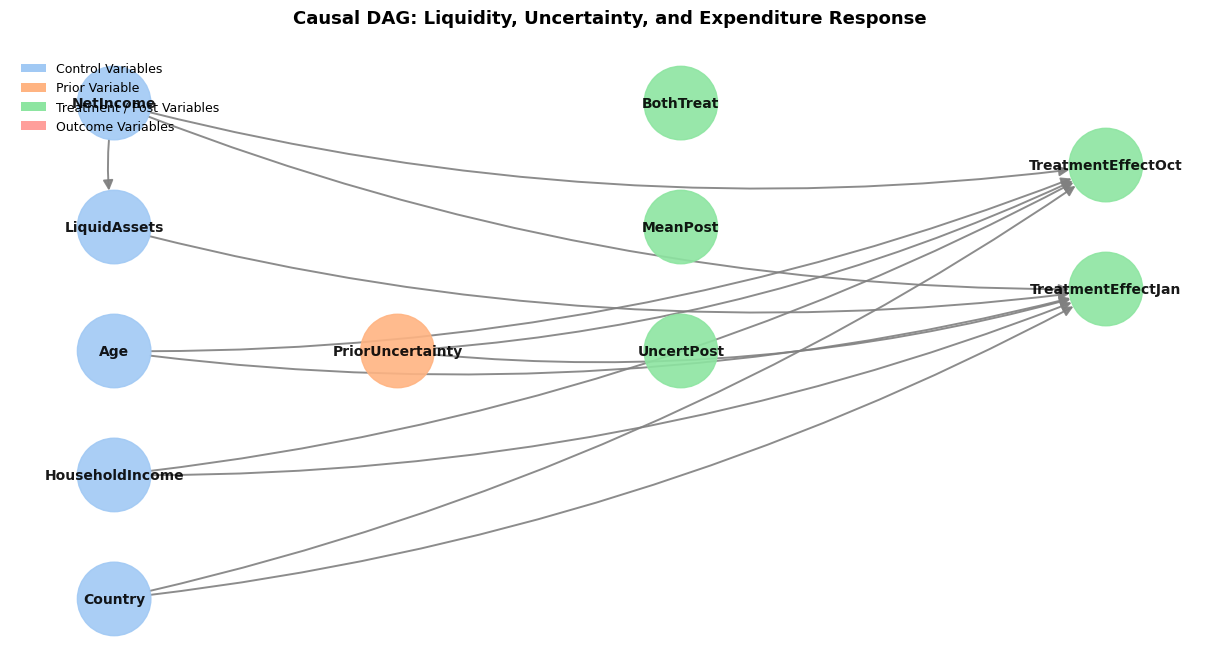

✅ DAG saved as 'DAG_clean_layout.pdf'


In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === Parse graph ===
graph = nx.parse_gml(sample_gml2)

# === Define color groups ===
group_colors = {
    "Prior": "#A1C9F4",      # light blue
    "Treat": "#FFB482",      # orange
    "Post": "#8DE5A1",       # green
    "Outcome": "#FF9F9B",    # pink
    "Other": "#D0BBFF"       # purple
}

# === Assign colors ===
node_colors = []
for node in graph.nodes():
    label = str(node)
    if "Prior" in label:
        node_colors.append(group_colors["Prior"])
    elif "Treat" in label:
        node_colors.append(group_colors["Treat"])
    elif "Post" in label:
        node_colors.append(group_colors["Post"])
    elif "Consump" in label:
        node_colors.append(group_colors["Outcome"])
    else:
        node_colors.append(group_colors["Other"])

# === Manual layout (clean left-to-right) ===
pos = {
    # Controls
    "NetInc": (0, 1),
    "HouseholdSize": (0, 0),
    "Age": (0, -1),
    # Prior stage
    "MeanPrior": (1, 0.5),
    "UncertPrior": (1, -0.5),
    # Treatment stage
    "MeanTreat": (2, 1),
    "UncertTreat": (2, 0),
    "BothTreat": (2, -1),
    # Post-treatment
    "MeanPost": (3, 0.5),
    "UncertPost": (3, -0.5),
    # Outcome
    "MonthConsump": (4, 0)
}

# === Plot ===
plt.figure(figsize=(12, 7))
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=2500,
    node_color=node_colors,
    font_color="black",
    font_size=9,
    font_weight="bold",
    edge_color="gray",
    width=1.2,
    alpha=0.9,
    connectionstyle="arc3,rad=0.05"
)

# === Legend ===
legend_elements = [
    Patch(facecolor=group_colors["Prior"], label="Prior Variables"),
    Patch(facecolor=group_colors["Treat"], label="Treatment Variables"),
    Patch(facecolor=group_colors["Post"], label="Post-Treatment Variables"),
    Patch(facecolor=group_colors["Outcome"], label="Outcome"),
    Patch(facecolor=group_colors["Other"], label="Controls")
]
plt.legend(handles=legend_elements, loc="upper left", frameon=False)

plt.title("Causal DAG: Consumption and Treatments", fontsize=13, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()

# === Save as image ===
plt.savefig("dag_clean2.pdf", dpi=300, bbox_inches="tight")  # PNG
# plt.savefig("dag_clean.pdf", bbox_inches="tight")          # (optional) PDF version
# plt.savefig("dag_clean.svg", bbox_inches="tight")          # (optional) SVG version

plt.show()


C:\Users\Zach\AppData\Local\Temp\ipykernel_24208\361981293.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


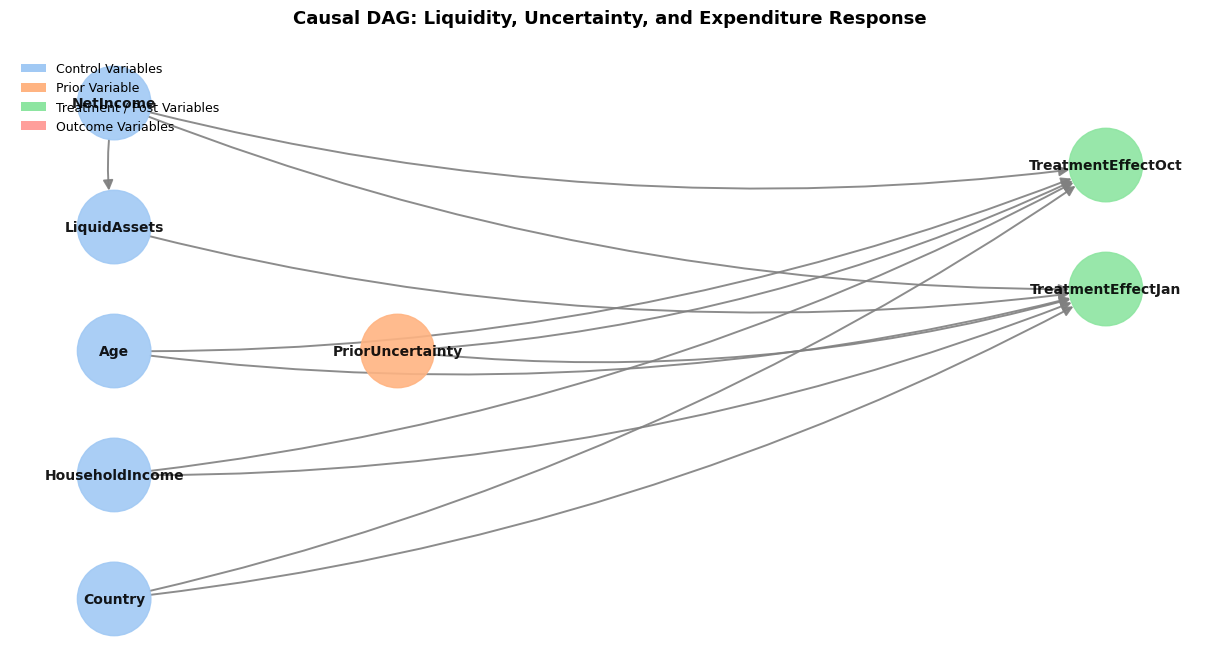

✅ DAG saved as 'DAG_clean_layout.pdf'


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from io import StringIO

# === DAG DATA ===
sample_gml2 = """graph [
  directed 1
  node [ id 0 label "NetIncome" ]
  node [ id 1 label "LiquidAssets" ]
  node [ id 2 label "PriorUncertainty" ]
  node [ id 3 label "Age" ]
  node [ id 4 label "HouseholdIncome" ]
  node [ id 5 label "Country" ]
  node [ id 6 label "TreatmentEffectOct" ]
  node [ id 7 label "TreatmentEffectJan" ]
  edge [ source 0 target 1 ]
  edge [ source 0 target 6 ]
  edge [ source 0 target 7 ]
  edge [ source 1 target 7 ]
  edge [ source 2 target 6 ]
  edge [ source 2 target 7 ]
  edge [ source 3 target 6 ]
  edge [ source 3 target 7 ]
  edge [ source 4 target 6 ]
  edge [ source 4 target 7 ]
  edge [ source 5 target 6 ]
  edge [ source 5 target 7 ]
]"""

# === PARSE GRAPH ===
graph = nx.parse_gml(StringIO(sample_gml2).read())

# === COLOR GROUPS ===
group_colors = {
    "Control": "#A1C9F4",     # light blue
    "Prior": "#FFB482",       # orange
    "Treatment": "#8DE5A1",   # green
    "Outcome": "#FF9F9B",     # pink
    "Other": "#D0BBFF"        # purple
}

# === ASSIGN COLORS BASED ON NAME ===
node_colors = []
for node in graph.nodes():
    label = str(node)
    if label in ["NetIncome", "LiquidAssets", "Age", "HouseholdIncome", "Country"]:
        node_colors.append(group_colors["Control"])
    elif "Prior" in label:
        node_colors.append(group_colors["Prior"])
    elif "Treat" in label or "Post" in label:
        node_colors.append(group_colors["Treatment"])
    elif "Effect" in label:
        node_colors.append(group_colors["Outcome"])
    else:
        node_colors.append(group_colors["Other"])

# === MANUAL LEFT→RIGHT LAYOUT ===
pos = {
    # Controls
    "NetIncome": (-2, 1),
    "LiquidAssets": (-2, 0),
    "Age": (-2, -1),
    "HouseholdIncome": (-2, -2),
    "Country": (-2, -3),

    # Prior
    "PriorUncertainty": (-1, -1),

    # Treatments
    "BothTreat": (0, 1),
    "MeanPost": (0, 0),
    "UncertPost": (0, -1),

    # Outcomes
    "TreatmentEffectOct": (1.5, 0.5),
    "TreatmentEffectJan": (1.5, -0.5)
}

# === DRAW GRAPH ===
plt.figure(figsize=(12, 6))
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=2800,
    node_color=node_colors,
    font_color="black",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=1.4,
    alpha=0.9,
    connectionstyle="arc3,rad=0.1",
    arrows=True,
    arrowsize=15
)

# === LEGEND ===
legend_elements = [
    Patch(facecolor=group_colors["Control"], label="Control Variables"),
    Patch(facecolor=group_colors["Prior"], label="Prior Variable"),
    Patch(facecolor=group_colors["Treatment"], label="Treatment / Post Variables"),
    Patch(facecolor=group_colors["Outcome"], label="Outcome Variables"),
]
plt.legend(handles=legend_elements, loc="upper left", frameon=False, fontsize=9)

plt.title("Causal DAG: Liquidity, Uncertainty, and Expenditure Response", fontsize=13, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()

# === SAVE PDF ===
plt.savefig("2DAG_clean_layout.pdf", dpi=300, bbox_inches="tight")
plt.show()

print("✅ DAG saved as 'DAG_clean_layout.pdf'")


C:\Users\Zach\AppData\Local\Temp\ipykernel_24208\3904260479.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


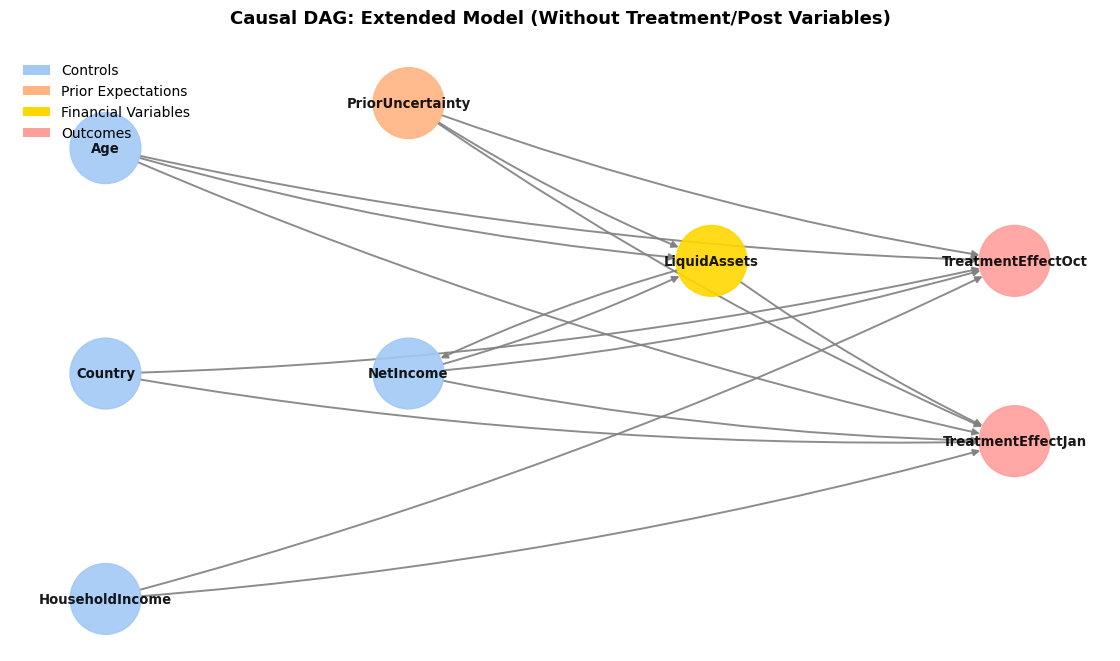

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === Define the graph ===
G = nx.DiGraph()

# --- Nodes ---
nodes = {
    "Age": "Control",
    "Country": "Control",
    "HouseholdIncome": "Control",
    "NetIncome": "Control",
    "PriorUncertainty": "Prior",
    "LiquidAssets": "Financial",
    "TreatmentEffectOct": "Outcome",
    "TreatmentEffectJan": "Outcome",
}

# --- Add nodes ---
G.add_nodes_from(nodes.keys())

# --- Add edges (including extended specifications) ---
edges = [
    # Original and new causal paths
    ("NetIncome", "LiquidAssets"),
    ("LiquidAssets", "NetIncome"),
    ("PriorUncertainty", "LiquidAssets"),
    ("Age", "LiquidAssets"),

    ("NetIncome", "TreatmentEffectOct"),
    ("NetIncome", "TreatmentEffectJan"),
    ("LiquidAssets", "TreatmentEffectJan"),
    ("PriorUncertainty", "TreatmentEffectOct"),
    ("PriorUncertainty", "TreatmentEffectJan"),
    ("Age", "TreatmentEffectOct"),
    ("Age", "TreatmentEffectJan"),
    ("HouseholdIncome", "TreatmentEffectOct"),
    ("HouseholdIncome", "TreatmentEffectJan"),
    ("Country", "TreatmentEffectOct"),
    ("Country", "TreatmentEffectJan"),
]
G.add_edges_from(edges)

# --- Define color palette by node type ---
group_colors = {
    "Control": "#A1C9F4",   # light blue
    "Prior": "#FFB482",     # orange
    "Financial": "#FFD700", # gold
    "Outcome": "#FF9F9B"    # pink
}

# --- Assign node colors ---
node_colors = [group_colors[nodes[n]] for n in G.nodes()]

# --- Manual layout (left-to-right) ---
pos = {
    "Age": (0, 1),
    "Country": (0, 0),
    "HouseholdIncome": (0, -1),
    "NetIncome": (1, 0),
    "PriorUncertainty": (1, 1.2),
    "LiquidAssets": (2, 0.5),
    "TreatmentEffectOct": (3, 0.5),
    "TreatmentEffectJan": (3, -0.3),
}

# --- Plot ---
plt.figure(figsize=(11, 6))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=2600,
    node_color=node_colors,
    font_color="black",
    font_size=9.5,
    font_weight="bold",
    edge_color="gray",
    width=1.4,
    alpha=0.9,
    connectionstyle="arc3,rad=0.05"
)

# --- Legend ---
legend_elements = [
    Patch(facecolor=group_colors["Control"], label="Controls"),
    Patch(facecolor=group_colors["Prior"], label="Prior Expectations"),
    Patch(facecolor=group_colors["Financial"], label="Financial Variables"),
    Patch(facecolor=group_colors["Outcome"], label="Outcomes"),
]
plt.legend(handles=legend_elements, loc="upper left", frameon=False)

plt.title("Causal DAG: Extended Model (Without Treatment/Post Variables)", fontsize=13, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()
plt.savefig("DAG_Extended_NoTreatments.pdf", dpi=300, bbox_inches="tight")
plt.show()
